**Load Dataset**

In [1]:
# necessary Library imports 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from collections import Counter as c
import missingno as msno

In [68]:
# loading data
df= pd.read_csv('cleaned dataset.csv')
df.head()

,Unnamed: 0,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,6.3,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.7,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Building**

In [86]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [104]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

**KNN**

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9535714285714286
Test Accuracy of KNN is 0.9083333333333333 

Confusion Matrix :- 
[[65  7]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        72
           1       0.86      0.92      0.89        48

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



**Decision Tree Classifier**

In [106]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [107]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [2, 3, 4, 6, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [108]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
1.0


In [109]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9642857142857143
Test Accuracy of Decision Tree Classifier is 0.9333333333333333 

Confusion Matrix :- 
[[72  0]
 [ 8 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        72
           1       1.00      0.83      0.91        48

    accuracy                           0.93       120
   macro avg       0.95      0.92      0.93       120
weighted avg       0.94      0.93      0.93       120



**Random Forest Classifier**

In [110]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**Model Comparison**

In [111]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,1.000000
1,Decision Tree Classifier,0.933333
0,KNN,0.908333


In [112]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

**we find random forest classifier more reliable**

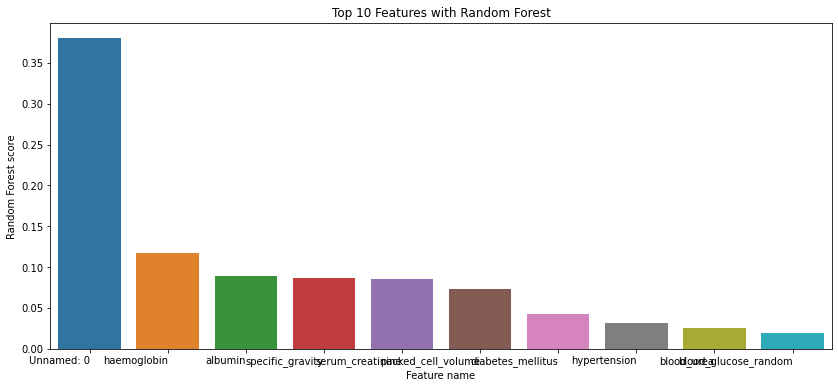

In [113]:
feature_scores=pd.DataFrame(rd_clf.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(14,6))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

In [114]:
top10_feature.index

Index(['Unnamed: 0', 'haemoglobin', 'albumin', 'specific_gravity',
       'serum_creatinine', 'packed_cell_volume', 'diabetes_mellitus',
       'hypertension', 'blood_urea', 'blood_glucose_random'],
      dtype='object')

In [115]:
X.columns

Index(['Unnamed: 0', 'age', 'blood_pressure', 'specific_gravity', 'albumin',
       'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [116]:
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [117]:
X.head()

,Unnamed: 0,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,packed_cell_volume,hypertension,diabetes_mellitus
0,0,1.020,1.0,121.0,36.0,1.2,15.4,44.0,1,1
1,1,1.020,4.0,203.0,18.0,0.8,11.3,38.0,0,0
2,2,1.010,2.0,423.0,53.0,1.8,9.6,31.0,0,1
3,3,1.005,4.0,117.0,56.0,3.8,11.2,32.0,1,0
4,4,1.010,2.0,106.0,26.0,1.4,11.6,35.0,0,0


In [118]:
X_train=X_train[['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin',
       'packed_cell_volume', 'diabetes_mellitus', 'hypertension',
       'blood_glucose_random', 'red_blood_cell_count', 'blood_urea']]
X_test=X_test[['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin',
       'packed_cell_volume', 'diabetes_mellitus', 'hypertension',
       'blood_glucose_random', 'red_blood_cell_count', 'blood_urea']]
rd_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

**Sample Predictions**

In [121]:
# Prediction 1
import warnings
warnings.filterwarnings('ignore')

prediction = rd_clf.predict([[1.025,15.8,1.1,0.0,53.0,0,0,131.0,6.1,18.0]])[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [122]:
# Prediction 2
prediction = rd_clf.predict([[1.020,15.4,1.2,1.0,44.0,1,1,121.0,5.2,36.0]])[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Great! You don't have Chronic Kidney Disease.


In [123]:
import pickle
pickle.dump(rd_clf,open("CKD.pkl","wb"))